
## Linear Regression Model for San Juan, PR

### Data set up

In [42]:
import pandas as pd
import numpy as np

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
%matplotlib inline

In [45]:
sj = pd.read_csv('../data/sj.csv', index_col=0)

In [46]:
sj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 24 columns):
city                                     936 non-null object
year                                     936 non-null int64
weekofyear                               936 non-null int64
week_start_date                          936 non-null object
ndvi_ne                                  745 non-null float64
ndvi_nw                                  887 non-null float64
ndvi_se                                  917 non-null float64
ndvi_sw                                  917 non-null float64
precipitation_amt_mm                     927 non-null float64
reanalysis_air_temp_k                    930 non-null float64
reanalysis_avg_temp_k                    930 non-null float64
reanalysis_dew_point_temp_k              930 non-null float64
reanalysis_max_air_temp_k                930 non-null float64
reanalysis_min_air_temp_k                930 non-null float64
reanalysis_precip_amt_kg_per_m2  

In [47]:
sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_precip_mm,total_cases,station_min_temp_k,station_avg_temp_k,station_max_temp_k,station_diur_temp_rng_k
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,14.012857,2.628571,16.0,4,293.15,298.592857,302.55,280.050000
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,15.372857,2.371429,8.6,5,295.35,299.864286,304.85,279.521429
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,16.848571,2.300000,41.4,4,295.95,299.864286,305.35,279.635714
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,16.672857,2.428571,4.0,3,296.45,300.621429,306.45,279.921429
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,17.210000,3.014286,5.8,6,297.05,302.092857,308.15,282.521429


In [48]:
sj.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_precip_mm', 'total_cases', 'station_min_temp_k',
       'station_avg_temp_k', 'station_max_temp_k', 'station_diur_temp_rng_k'],
      dtype='object')

Look at the distribution of the total dengue cases from 1990-2010

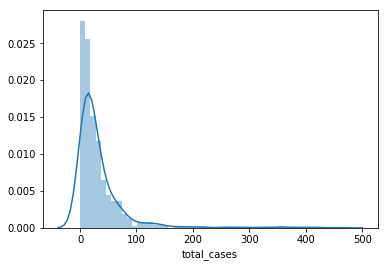

In [49]:
sns.distplot(sj['total_cases'])

## Linear Regression

### Sum up the number of values missing in each column

In [50]:
sj.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_precip_mm                          6
total_cases                                0
station_min_temp_k                         6
station_avg_temp_k                         6
station_ma

In [51]:
sum([True for idx,row in sj.iterrows() if any(row.isnull())])

209

#### Because most of the values missing are ``ndvi`` data, I will be dropping these columns for my first linear model for San Juan

In [52]:
sj.drop(sj.columns[[4, 5, 6, 7]], axis=1, inplace=True)

In [53]:
sj.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
precipitation_amt_mm                     9
reanalysis_air_temp_k                    6
reanalysis_avg_temp_k                    6
reanalysis_dew_point_temp_k              6
reanalysis_max_air_temp_k                6
reanalysis_min_air_temp_k                6
reanalysis_precip_amt_kg_per_m2          6
reanalysis_relative_humidity_percent     6
reanalysis_specific_humidity_g_per_kg    6
reanalysis_tdtr_k                        6
station_precip_mm                        6
total_cases                              0
station_min_temp_k                       6
station_avg_temp_k                       6
station_max_temp_k                       6
station_diur_temp_rng_k                  6
dtype: int64

In [54]:
sum([True for idx,row in sj.iterrows() if any(row.isnull())])

9

#### Now we only have 9 rows with missing values - much better than the 209 rows before!

I'll be deleting the ``city``, ``week_start_date``, and ``year`` from the dataframe

In [55]:
sj.drop(sj.columns[[0, 1, 3]], axis=1, inplace=True)

In [56]:
sj.columns

Index(['weekofyear', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_precip_mm', 'total_cases', 'station_min_temp_k',
       'station_avg_temp_k', 'station_max_temp_k', 'station_diur_temp_rng_k'],
      dtype='object')

In [57]:
sj.corr()

,weekofyear,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_precip_mm,total_cases,station_min_temp_k,station_avg_temp_k,station_max_temp_k,station_diur_temp_rng_k
weekofyear,1.000000,0.231961,0.575381,0.561001,0.578072,0.519083,0.574494,0.253975,0.306771,0.585224,-0.099084,0.213336,0.287134,0.520129,0.485038,0.325748,-0.137093
precipitation_amt_mm,0.231961,1.000000,0.233912,0.222311,0.402744,0.256677,0.246372,0.508953,0.501149,0.410019,-0.093928,0.565961,0.060211,0.224667,0.196218,0.193713,-0.158479
reanalysis_air_temp_k,0.575381,0.233912,1.000000,0.997495,0.903287,0.935089,0.942254,0.079883,0.299139,0.904819,0.175060,0.113726,0.181917,0.832863,0.880931,0.697949,0.039391
reanalysis_avg_temp_k,0.561001,0.222311,0.997495,1.000000,0.895123,0.938952,0.939120,0.062023,0.285179,0.896178,0.198187,0.097849,0.175267,0.827112,0.879129,0.703316,0.053967
reanalysis_dew_point_temp_k,0.578072,0.402744,0.903287,0.895123,1.000000,0.847236,0.898814,0.328449,0.679369,0.998532,-0.035965,0.285280,0.203774,0.850157,0.868930,0.689811,-0.056715
reanalysis_max_air_temp_k,0.519083,0.256677,0.935089,0.938952,0.847236,1.000000,0.828478,0.091037,0.288485,0.853216,0.350008,0.104832,0.194532,0.770742,0.852529,0.760859,0.113533
reanalysis_min_air_temp_k,0.574494,0.246372,0.942254,0.939120,0.898814,0.828478,1.000000,0.132483,0.385908,0.896218,-0.052677,0.150992,0.187943,0.829437,0.841656,0.626844,-0.023968
reanalysis_precip_amt_kg_per_m2,0.253975,0.508953,0.079883,0.062023,0.328449,0.091037,0.132483,1.000000,0.602747,0.334400,-0.307892,0.478122,0.107457,0.197903,0.134192,0.079711,-0.252450
reanalysis_relative_humidity_percent,0.306771,0.501149,0.299139,0.285179,0.679369,0.288485,0.385908,0.602747,1.000000,0.674255,-0.374868,0.444452,0.144045,0.466890,0.427729,0.343247,-0.193822
reanalysis_specific_humidity_g_per_kg,0.585224,0.410019,0.904819,0.896178,0.998532,0.853216,0.896218,0.334400,0.674255,1.000000,-0.028801,0.288529,0.207947,0.849247,0.870008,0.691044,-0.059680


In [58]:
# I'll be using scikit learn's Imputer module to fill in the misisng values
from sklearn.preprocessing import Imputer
fill_NaN = Imputer(missing_values=np.nan, strategy='mean', axis=1)

In [59]:
imputed_sj = pd.DataFrame(fill_NaN.fit_transform(sj))
imputed_sj.columns = sj.columns
imputed_sj.index = sj.index

In [60]:
# Looks good!
imputed_sj.isnull().sum()

weekofyear                               0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_precip_mm                        0
total_cases                              0
station_min_temp_k                       0
station_avg_temp_k                       0
station_max_temp_k                       0
station_diur_temp_rng_k                  0
dtype: int64

#### Now we can move on to creating our first linear regression model

### Create linear regression model for San Juan

In [68]:
# set target variable
y = imputed_sj['total_cases']

In [69]:
imputed_sj.drop('total_cases', inplace=True, axis=1)

In [70]:
from sklearn.model_selection import train_test_split

Create training data and test data (test size will use 30% of the data, random state specifies a random split)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(imputed_sj, y, test_size=0.3)
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((281, 16), (281,))

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
lm = LinearRegression()

In [74]:
model = lm.fit(X_train, y_train)

/Users/annas.kiefer/Desktop/dengue_fever/env/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [75]:
predictions = lm.predict(X_test)

In [76]:
len(predictions), len(y_test)

(281, 281)

In [77]:
from sklearn import metrics

In [78]:
metrics.mean_absolute_error(y_test, predictions)

26.81265583273391

In [79]:
metrics.mean_squared_error(y_test, predictions)

1863.5130533628637

In [86]:
# calculate the Rsquared
# 5% of variance in total cases is explained by our features
lm.score(X_test, y_test)

0.059125867844724393

In [87]:
print(lm.intercept_)

37.2909536244


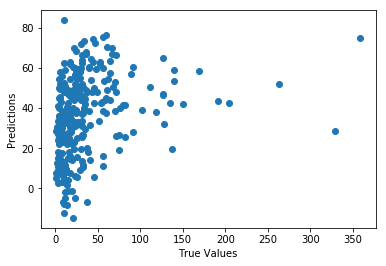

In [81]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [82]:
"Score: ", model.score(X_test, y_test)

('Score: ', 0.059125867844724393)

### As the resulting MAE was large for the first linear model, I will be deleting some of the columns with a low correlation and re-creating a linear model

In [89]:
# deleting station_precipitation_mm, precipitation_amount_mm, reanalysis_tdtr_k, and station_diur_temp_rng_k
imputed_sj.columns

Index(['weekofyear', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_precip_mm', 'station_min_temp_k', 'station_avg_temp_k',
       'station_max_temp_k', 'station_diur_temp_rng_k'],
      dtype='object')

In [90]:
imputed_sj.drop(sj.columns[[1, 10, 11, 15]], axis=1, inplace=True)

In [91]:
imputed_sj.columns

Index(['weekofyear', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'station_min_temp_k',
       'station_avg_temp_k', 'station_max_temp_k'],
      dtype='object')

In [92]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(imputed_sj, y, test_size=0.3)
X_train_2.shape, y_train_2.shape
X_test_2.shape, y_test_2.shape

((281, 12), (281,))

In [93]:
lm2 = LinearRegression()

In [99]:
model = lm2.fit(X_train_2, y_train_2)

In [100]:
predictions_2 = lm2.predict(X_test_2)

In [97]:
metrics.mean_absolute_error(y_test_2, predictions_2)

29.172113531721205

In [102]:
len(X_test_2), len(y_test_2)

(281, 281)

In [105]:
# calculate the R squared
# 9% of variance in total cases is explained by our features
# Slightly better, but still not good
lm2.score(X_test_2, y_test_2)

0.090993550626818909

### Average the NDVIs and add a new column

In [ ]:
df['ndvi_avg'] = df[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].mean(axis=1)

In [ ]:
df.head()

### Delete the following columns as they have low correlation (as seen in correlation table above):
- precipitation amount mm
- reanalysis_sat_precip_amt_mm
- station_max_temp_c
- station_precip_mm
- reanalysis_avg_temp (strong positive correlation with reanalysis_air_temp)

In [ ]:
df1 = df[['city', 'year', 'weekofyear', 'reanalysis_air_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c',
       'station_min_temp_c', 'total_cases', 'ndvi_avg']]

In [ ]:
sj = df1[df1['city'] == 'sj']

In [ ]:
iq = df1[df1['city'] == 'iq']

In [ ]:
sj.drop('city', inplace=True, axis=1)

In [ ]:
sj.head()

Do this for different input data

In [ ]:
def create_lr_model(data, columns_to_drop):
    data = data.dropna()
    y = data['total_cases']
    lm = LinearRegression()
    for column in columns_to_drop:
        data.drop(column, inplace=True, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
        data, y, test_size=0.3)
    X_train.shape, y_train.shape
    X_test.shape, y_test.shape
    model = lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, predictions)
    return mae

In [ ]:
df2 = pd.read_csv('../data/dengue_features_entire.csv')

In [ ]:
df2.head()

In [ ]:
sj_2 = df2[df2['city'] == 'sj']

In [ ]:
sj_2.head()

In [ ]:
sj_model_1_maes = []
num_trials = 0
while num_trials <== 10:
    mae = create_lr_model(sj_2, ['total_cases', 'city', 'precipitation_amt_mm', 'week_start_date'])
    sj_model_1_maes.append(mae)
    num_trails += 1

In [ ]:
sj_model_1_maes

In [ ]:
sj_model_2 = create_lr_model(sj_2, [x for x in list(sj_2) if x != 'reanalysis_air_temp_k' and x != 'station_min_temp_c']) 

In [ ]:
sj_model_2

In [ ]:
test

In [ ]:
mae_sj

Create training data and test data (test size will use 40% of the data, random state specifies a random split)

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.4, random_state=101)

In [ ]:
# from sklearn.linear_model import LinearRegression

In [ ]:
# lm = LinearRegression()

In [ ]:
# lm.fit(X1_train, y1_train)

In [ ]:
# print(lm.intercept_)

In [ ]:
# lm.coef_

In [ ]:
# X1_train.columns

In [ ]:
# cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [ ]:
# predictions = lm.predict(X1_test)

In [ ]:
# plt.scatter(y1_test, predictions)

In [ ]:
# from sklearn import metrics

In [ ]:
# metrics.mean_absolute_error(y1_test, predictions)

In [ ]:
# metrics.mean_squared_error(y1_test, predictions)

In [ ]:
# np.sqrt(metrics.mean_squared_error(y1_test, predictions))

### Using all of the features in a linear regression model results in high variance, high bias and a weak linear relationship. <br> <font color="#2bbbad">Perhaps using only one feature will yield better results?</font>